In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Load the data

In [ ]:
data = pd.read_csv("HR_Analytics.csv")
data.head()

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1                         1             80                 0   
2                         4             80                 0   
3                         4             80                 0   
4                         4             80                 0   

  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 0                      2                3               0   
1                 0                      2                3               0   
2                 0                      3                3               0   
3                 0                      2                3               0   
4                 0                      0                3               0   

  YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                  0                        0                  0.0  
1                  0                        0                  0.0  
2                  0                        0                  0.0  
3                  0                        0                  0.0  
4                  0                        0                  0.0  

[5 rows x 38 columns]

In [136]:
data.shape

(1480, 38)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [138]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1480.000000  1480.000000       1480.000000  1480.000000         1480.0   
mean     36.917568   801.384459          9.220270     2.910811            1.0   
std       9.128559   403.126988          8.131201     1.023796            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   800.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1480.000000              1480.000000  1480.000000     1480.000000   
mean      1031.860811                 2.724324    65.845270        2.729730   
std        605.955046                 1.092579    20.328266        0.713007   
min          1.000000                 1.000000    30.000000        1.000000   
25%        493.750000                 2.000000    48.000000        2.000000   
50%       1027.500000                 3.000000    66.000000        3.000000   
75%       1568.250000                 4.000000    83.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1480.000000  ...               1480.000000         1480.0   
mean      2.064865  ...                  2.708784           80.0   
std       1.105574  ...                  1.081995            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1480.000000        1480.000000            1480.000000   
mean           0.791892          11.281757               2.797973   
std            0.850527           7.770870               1.288791   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1480.000000     1480.000000         1480.000000   
mean          2.760811        7.009459            4.228378   
std           0.707024        6.117945            3.616020   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1480.000000           1423.000000  
mean                  2.182432              4.118060  
std                   3.219357              3.555484  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [139]:
data.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [140]:
data.drop([
    'EmpID',
    'AgeGroup',
    'EmployeeCount',       
    'EmployeeNumber',      
    'Over18',
    'HourlyRate',
    'SalarySlab',
    'StandardHours',
    'PerformanceRating',
    'DailyRate',           
    'MonthlyRate'          
], axis=1, inplace=True, errors='ignore')

In [141]:
data.shape

(1480, 27)

In [142]:
data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   18       Yes      Travel_Rarely  Research & Development                 3   
1   18        No      Travel_Rarely                   Sales                10   
2   18       Yes  Travel_Frequently                   Sales                 5   
3   18        No         Non-Travel  Research & Development                 5   
4   18       Yes         Non-Travel  Research & Development                 8   

   Education EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
0          3  Life Sciences                        3    Male               3   
1          3        Medical                        4  Female               2   
2          3      Marketing                        2    Male               3   
3          2  Life Sciences                        2    Male               3   
4          1        Medical                        3    Male               3   

   ...  PercentSalaryHike RelationshipSatisfaction  StockOptionLevel  \
0  ...                 13                        3                 0   
1  ...                 12                        1                 0   
2  ...                 14                        4                 0   
3  ...                 15                        4                 0   
4  ...                 12                        4                 0   

  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                 0                      2                3              0   
1                 0                      2                3              0   
2                 0                      3                3              0   
3                 0                      2                3              0   
4                 0                      0                3              0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   0                        0                   0.0  
1                   0                        0                   0.0  
2                   0                        0                   0.0  
3                   0                        0                   0.0  
4                   0                        0                   0.0  

[5 rows x 27 columns]

# 2. Data Preprocessing

In [143]:
# check category columns
category_cols = data.select_dtypes(include=['object', 'category']).columns
print("category columns \n:" ,category_cols)

category columns 
: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [144]:
# check unique values
for col in category_cols:
    print(f"{col}: {data[col].unique()}")

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'TravelRarely']
Department: ['Research & Development' 'Sales' 'Human Resources']
EducationField: ['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']
Gender: ['Male' 'Female']
JobRole: ['Laboratory Technician' 'Sales Representative' 'Research Scientist'
 'Human Resources' 'Manufacturing Director' 'Sales Executive'
 'Healthcare Representative' 'Research Director' 'Manager']
MaritalStatus: ['Single' 'Divorced' 'Married']
OverTime: ['No' 'Yes']


In [145]:
# check numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:\n", numerical_cols)

Numerical Columns:
 Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [146]:
# check unique values
for col in numerical_cols:
    print(f"{col}: {data[col].unique()}")

Age: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
DistanceFromHome: [ 3 10  5  8  1 14 22  2 21  9 25  6  4 11 15 12 18  7 16 19 26 20 24 23
 17 13 29 28 27]
Education: [3 2 1 4 5]
EnvironmentSatisfaction: [3 4 2 1]
JobInvolvement: [3 2 1 4]
JobLevel: [1 2 3 4 5]
JobSatisfaction: [3 2 4 1]
MonthlyIncome: [ 1420  1200  1878 ... 10266  5220 10883]
NumCompaniesWorked: [1 0 5 6 3 2 9 8 7 4]
PercentSalaryHike: [13 12 14 15 16 19 21 22 25 18 11 17 24 20 23]
RelationshipSatisfaction: [3 1 4 2]
StockOptionLevel: [0 2 1 3]
TotalWorkingYears: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 27 29 31 30 32 33 34 35 36 37 38 40]
TrainingTimesLastYear: [2 3 0 5 4 6 1]
WorkLifeBalance: [3 4 1 2]
YearsAtCompany: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 23 26 31 27 32 30 29 33 34 36 37 40]
YearsInCurrentRole: [ 0  1  2  3  4  5  7  8  6  9 10 1

In [147]:
# data cleaning
data.isnull().sum()

Age                          0
Attrition                    0
BusinessTravel               0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager        57
dtype: int64

In [148]:
missing_pct = data['YearsWithCurrManager'].isnull().mean() * 100
print(f"Missing %: {missing_pct:.2f}%")

Missing %: 3.85%


In [149]:
# median imputation
median_val = data['YearsWithCurrManager'].median()
data['YearsWithCurrManager'].fillna(median_val, inplace=True)

In [150]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [151]:
data.duplicated().sum()

7

In [152]:
data.drop_duplicates(inplace=True)

In [153]:
data.duplicated().sum()

0

In [154]:
# validate data types
data.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager        float64
dtype: object

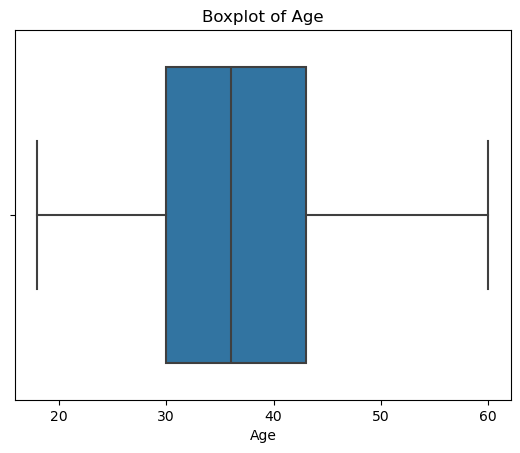

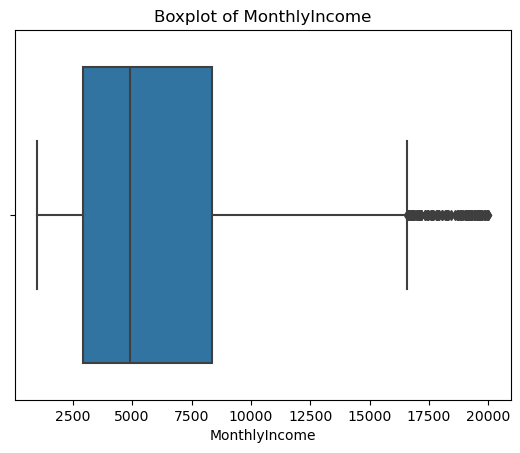

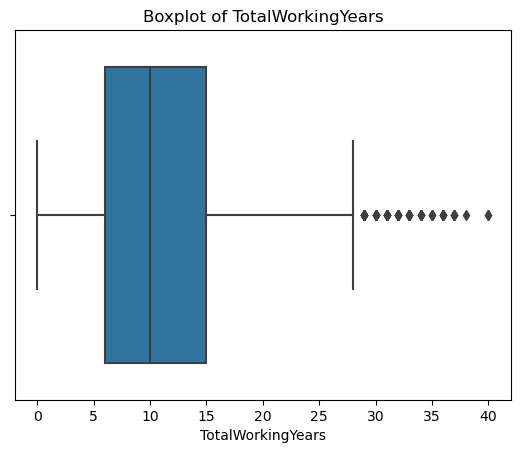

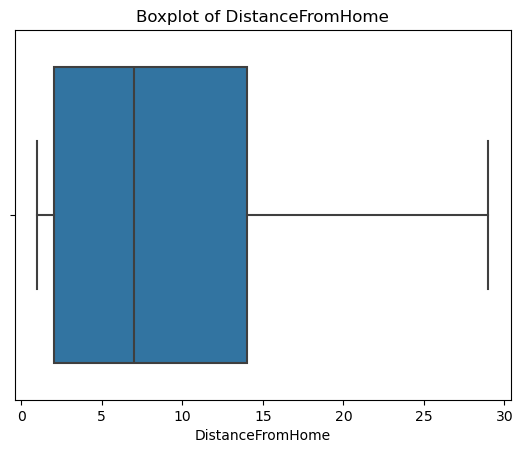

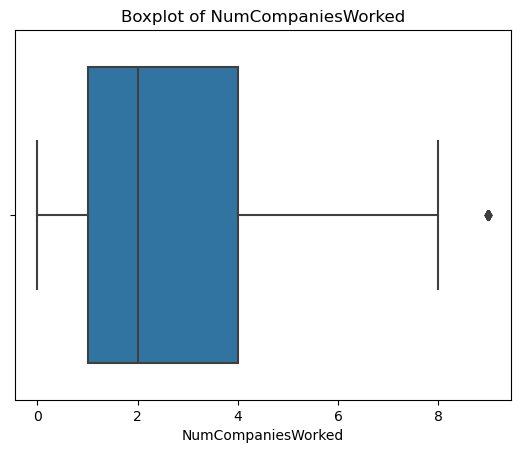

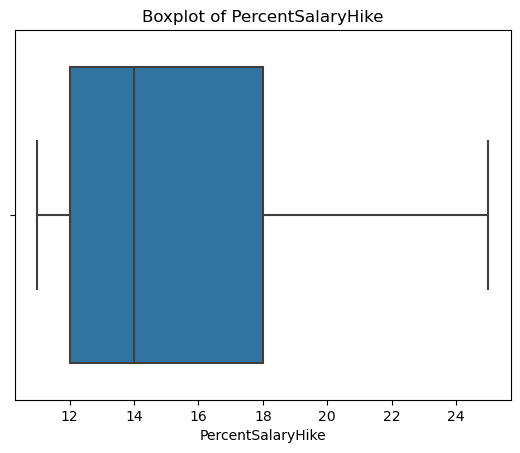

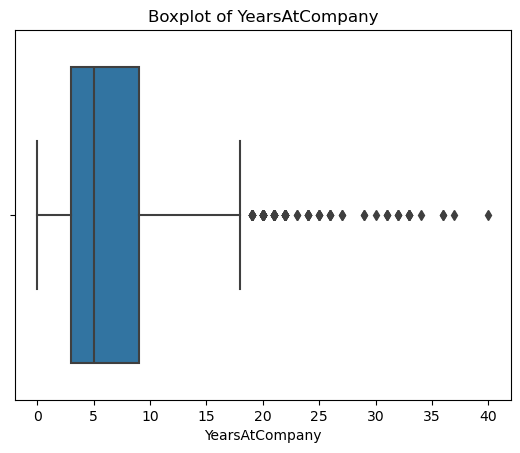

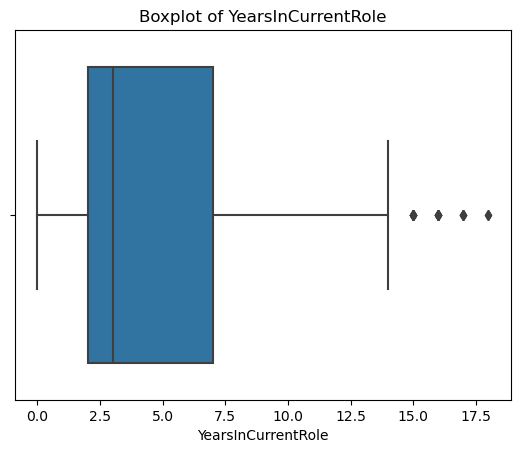

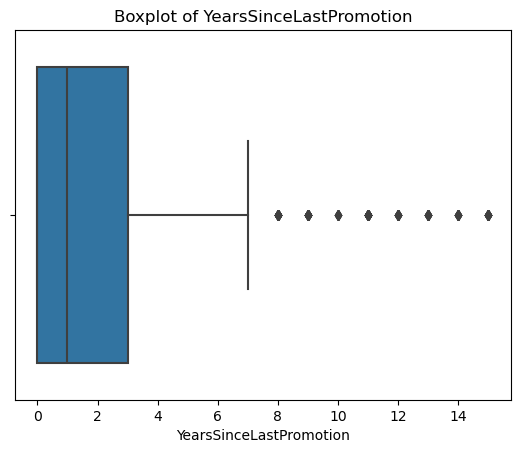

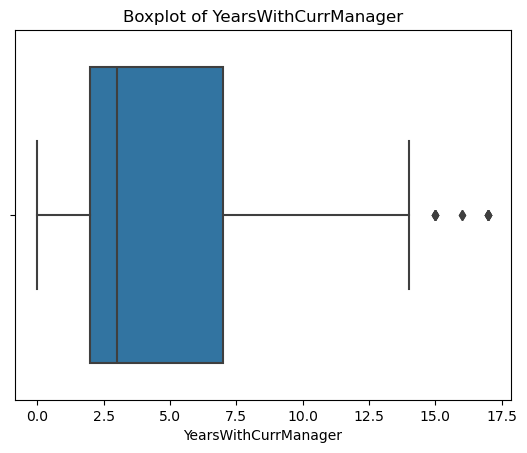

In [155]:
# outlier detection
for col in ['Age', 'MonthlyIncome', 'TotalWorkingYears','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [156]:
# flag or cap outliers
def handle_outliers_iqr(data, columns, cap=False):
    for col in columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3-Q1
            lower = Q1 -(1.5 * IQR)
            upper = Q3 +(1.5 * IQR)

            outliers = data[(data[col]<lower) | (data[col]>upper)]
            print(f"{col}: {len(outliers)} outliers")

            if cap:
                data[col] = data[col].clip(lower, upper)
    return data  

In [157]:
cols_to_check = [
    'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

data = handle_outliers_iqr(data, cols_to_check, cap=True)

MonthlyIncome: 114 outliers
TotalWorkingYears: 63 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 13 outliers


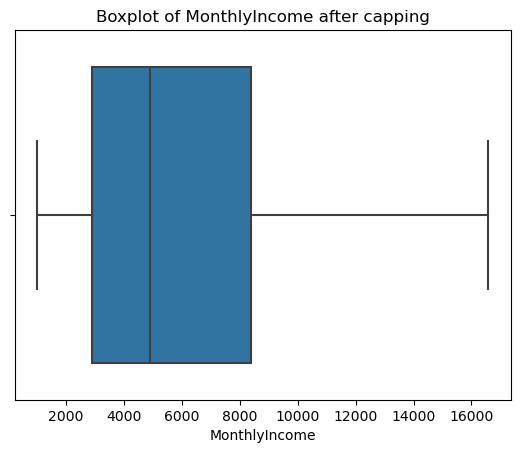

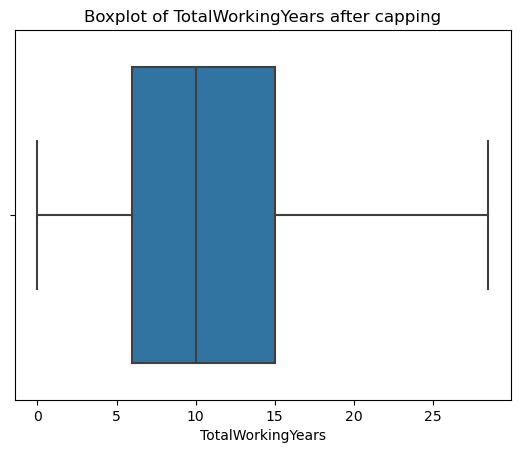

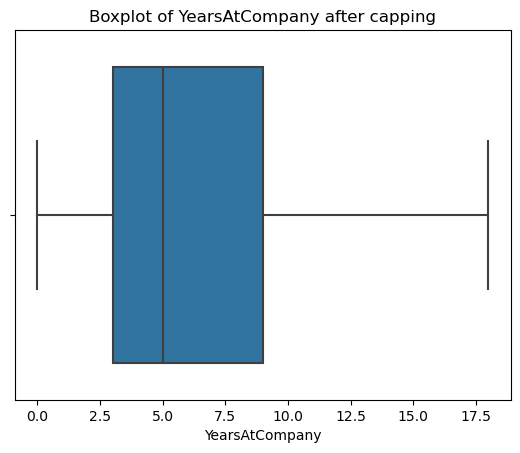

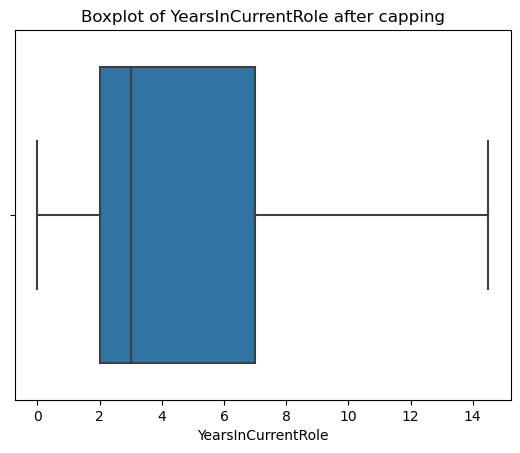

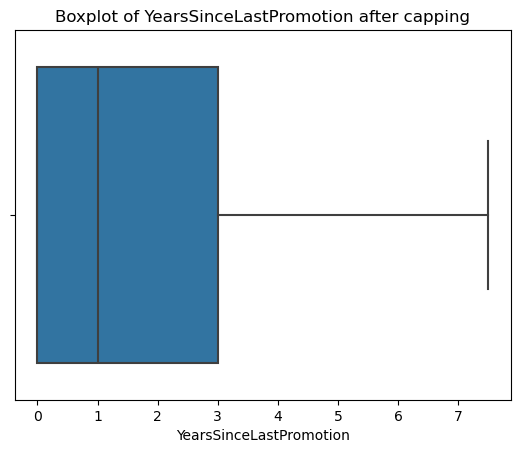

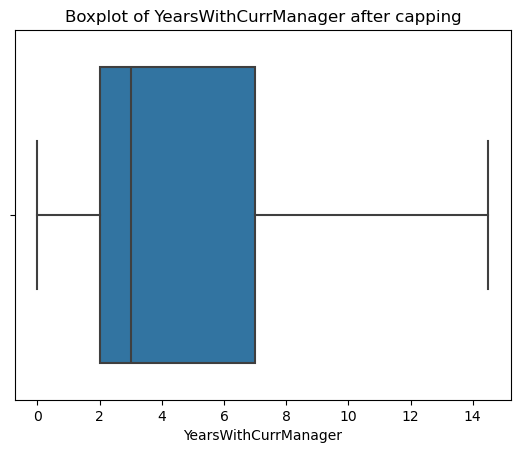

In [158]:
for col in cols_to_check:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col} after capping')
    plt.show()

In [159]:
# encode category columns
def encode_categoricals(data):
    #label encode binary columns
    binary_cols = ['Attrition', 'OverTime', 'Gender']
    le = LabelEncoder()
    for col in binary_cols:
        data[col] = le.fit_transform(data[col])

    #one-hot encode multi-class columns
    multi_class_cols = ['BusinessTravel', 'Department', 'EducationField',
        'JobRole', 'MaritalStatus']
    data = pd.get_dummies(data, columns=multi_class_cols, drop_first=True)
    return data

In [160]:
data = encode_categoricals(data)

In [161]:
data.head()

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   18          1                 3          3                        3   
1   18          0                10          3                        4   
2   18          1                 5          3                        2   
3   18          0                 5          2                        2   
4   18          1                 8          1                        3   

   Gender  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0       1               3         1                3         1420.0  ...   
1       0               2         1                3         1200.0  ...   
2       1               3         1                2         1878.0  ...   
3       1               3         1                4         1051.0  ...   
4       1               3         1                3         1904.0  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                    False                           True            False   
1                    False                          False            False   
2                    False                          False            False   
3                    False                          False            False   
4                    False                           True            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                    False   
1                       False                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                         False                  False                  True  
1                          True                  False                  True  
2                          True                  False                  True  
3                         False                  False                  True  
4                         False                  False                  True  

[5 rows x 42 columns]

In [162]:
# Convert all boolean columns to int
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [163]:
data.head()

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   18          1                 3          3                        3   
1   18          0                10          3                        4   
2   18          1                 5          3                        2   
3   18          0                 5          2                        2   
4   18          1                 8          1                        3   

   Gender  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0       1               3         1                3         1420.0  ...   
1       0               2         1                3         1200.0  ...   
2       1               3         1                2         1878.0  ...   
3       1               3         1                4         1051.0  ...   
4       1               3         1                3         1904.0  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              1                0   
1                        0                              0                0   
2                        0                              0                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                             0                      0                     1  
1                             1                      0                     1  
2                             1                      0                     1  
3                             0                      0                     1  
4                             0                      0                     1  

[5 rows x 42 columns]

In [164]:
data.dtypes

Age                                    int64
Attrition                              int32
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
Gender                                 int32
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                        float64
NumCompaniesWorked                     int64
OverTime                               int32
PercentSalaryHike                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                    float64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCurrentRole                   float64
YearsSinceLastPromotion              float64
YearsWithCurrManager                 float64
BusinessTr

# 3. EDA

<Axes: title={'center': 'Attrition Rate'}, xlabel='Attrition'>

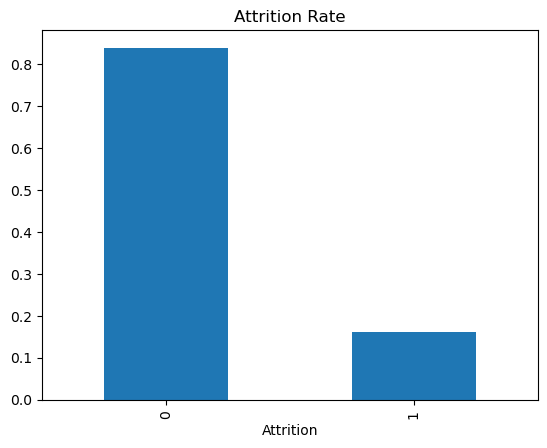

In [165]:
data['Attrition'].value_counts(normalize=True).plot(kind='bar', title='Attrition Rate') #0:NO , 1:yes

<Axes: title={'center': 'Monthly Income Distribution'}, ylabel='Frequency'>

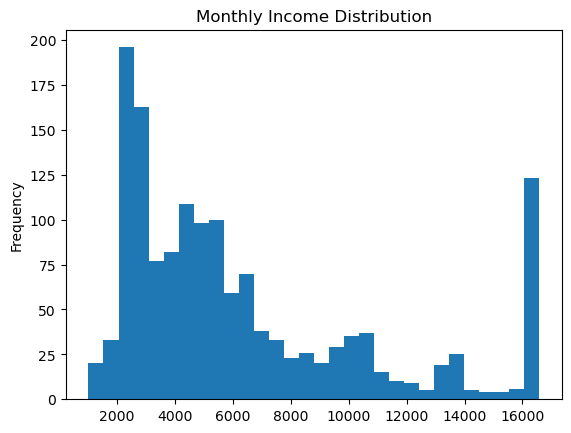

In [166]:
data['MonthlyIncome'].plot(kind='hist', bins=30, title='Monthly Income Distribution')

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

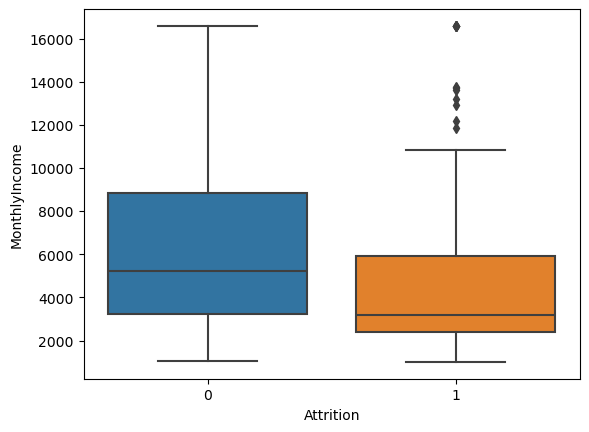

In [175]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)

C:\Users\sathv\AppData\Local\Temp\ipykernel_23776\4195282657.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Attrition']==1]['YearsAtCompany'], label='Attrition', shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sathv\AppData\Local\Temp\ipykernel_23776\4195282657.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Attrition']==0]['YearsAtCompany'], label='No Attrition', shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_a

Text(0.5, 1.0, 'Years at Company vs Attrition')

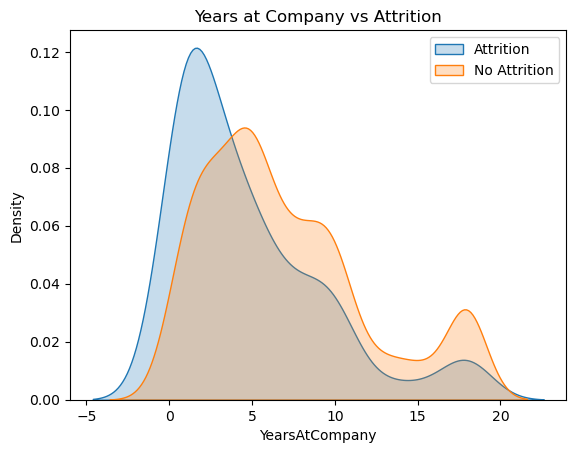

In [176]:
sns.kdeplot(data=data[data['Attrition']==1]['YearsAtCompany'], label='Attrition', shade=True)
sns.kdeplot(data=data[data['Attrition']==0]['YearsAtCompany'], label='No Attrition', shade=True)
plt.legend()
plt.title('Years at Company vs Attrition')

In [177]:
jobrole_cols = [col for col in data.columns if col.startswith('JobRole_')]
print(jobrole_cols)

['JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']


<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

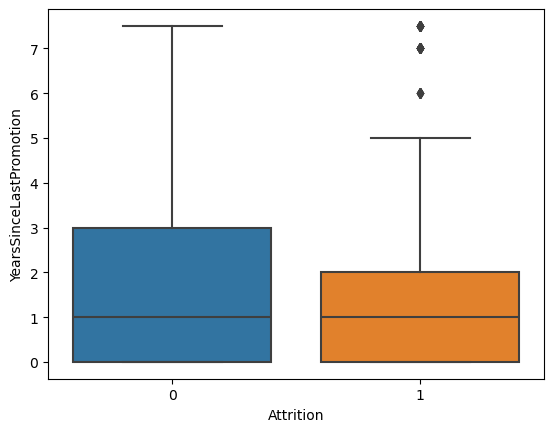

In [178]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data)

In [179]:
corr = data.corr()
corr['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime                             0.246532
MaritalStatus_Single                 0.175175
JobRole_Sales Representative         0.155247
BusinessTravel_Travel_Frequently     0.114604
JobRole_Laboratory Technician        0.097734
Department_Sales                     0.080694
DistanceFromHome                     0.077585
EducationField_Technical Degree      0.069614
EducationField_Marketing             0.056074
NumCompaniesWorked                   0.043469
JobRole_Human Resources              0.036378
Gender                               0.029298
JobRole_Sales Executive              0.020241
JobRole_Research Scientist           0.000085
PercentSalaryHike                   -0.013827
EducationField_Other                -0.018865
BusinessTravel_TravelRarely         -0.030258
Education                           -0.030526
EducationField_Life Sciences        -0.031926
YearsSinceLastPromotion             -0.036889
BusinessTravel_Travel_Rarely      

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


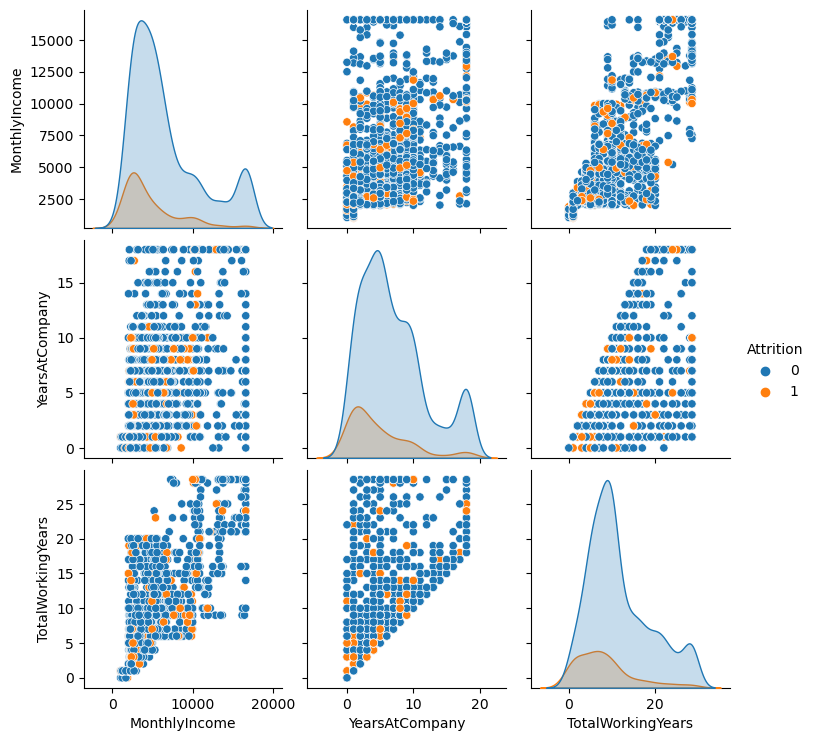

In [180]:
sns.pairplot(data[['Attrition', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears']], hue='Attrition')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


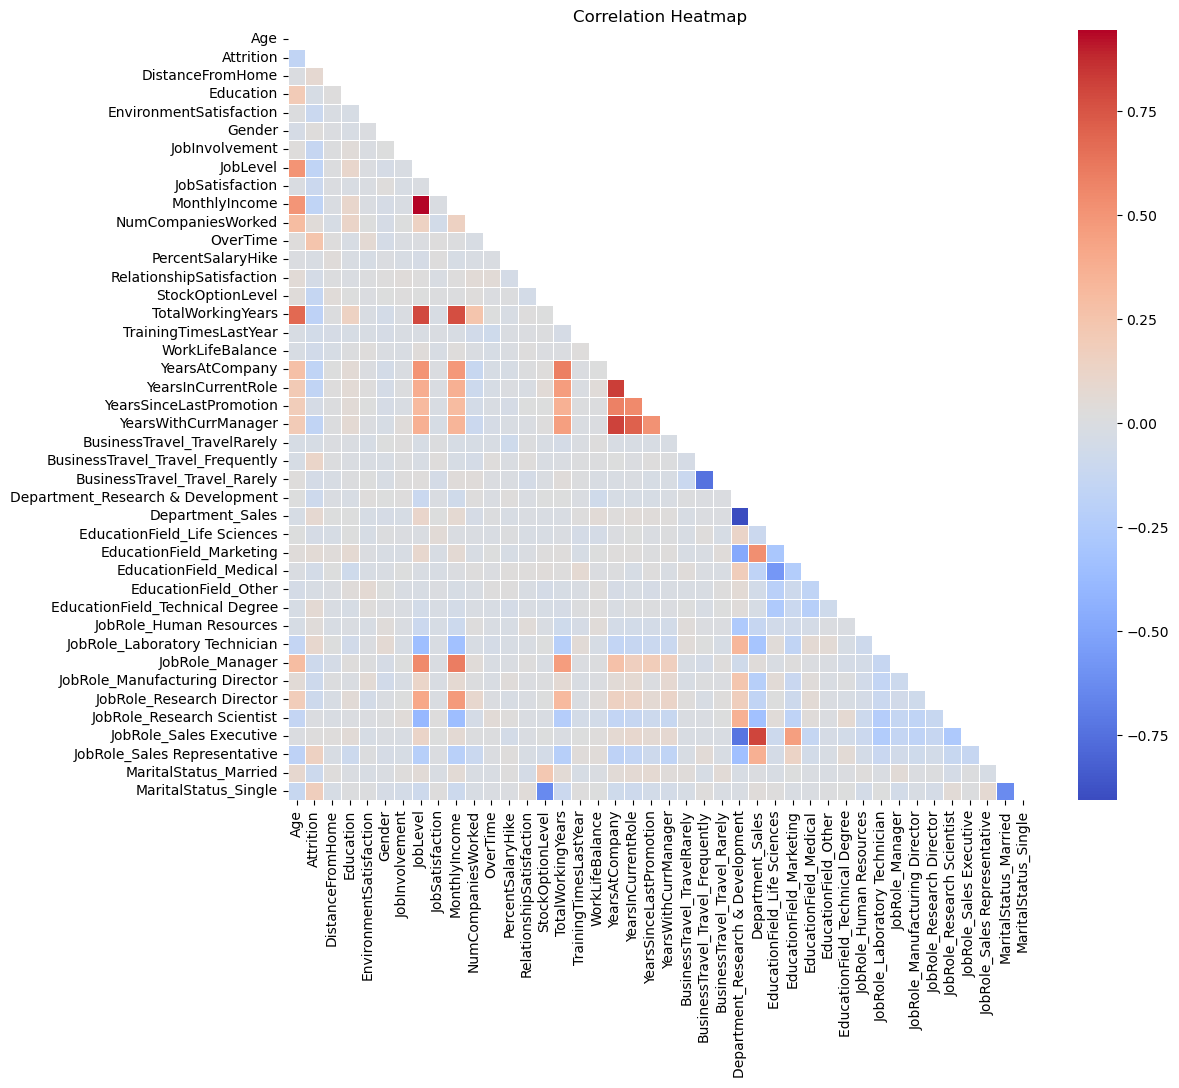

In [181]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

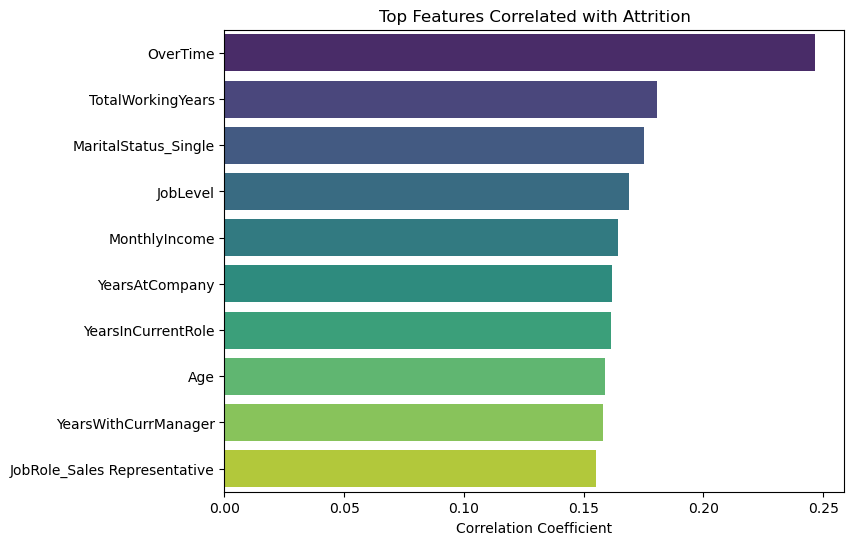

In [182]:
top_corr = corr['Attrition'].abs().sort_values(ascending=False)[1:11]  # exclude self-correlation
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top Features Correlated with Attrition')
plt.xlabel('Correlation Coefficient')
plt.show()

# 4. Feature Engineering

In [183]:
# Tenure Ratio -Measures how long someone has stayed at their current company relative to their total working years.
data['TenureRatio'] = data['YearsAtCompany'] / (data['TotalWorkingYears'] + 1e-5)

In [184]:
# Promotion gap - Captures how long it's been since their last promotion relative to their tenure.
data['PromotionGap'] = data['YearsSinceLastPromotion'] / (data['YearsAtCompany'] + 1e-5)

In [185]:
# Manager Tenure Alignment - Measures how long they've worked with their current manager compared to their role duration.
data['ManagerAlignment'] = data['YearsWithCurrManager'] / (data['YearsInCurrentRole'] + 1e-5)

In [186]:
# Income per Year Worked 
data['IncomePerYear'] = data['MonthlyIncome'] / (data['TotalWorkingYears'] + 1e-5)

In [187]:
# Satisfaction Index - Combines multiple satisfaction metrics into one composite score
data['SatisfactionIndex'] = (
    data['JobSatisfaction'] +
    data['EnvironmentSatisfaction'] +
    data['RelationshipSatisfaction'] +
    data['WorkLifeBalance']
)

In [188]:
data.head()

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   18          1                 3          3                        3   
1   18          0                10          3                        4   
2   18          1                 5          3                        2   
3   18          0                 5          2                        2   
4   18          1                 8          1                        3   

   Gender  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0       1               3         1                3         1420.0  ...   
1       0               2         1                3         1200.0  ...   
2       1               3         1                2         1878.0  ...   
3       1               3         1                4         1051.0  ...   
4       1               3         1                3         1904.0  ...   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             1                      0                     1   
2                             1                      0                     1   
3                             0                      0                     1   
4                             0                      0                     1   

   TenureRatio  PromotionGap  ManagerAlignment  IncomePerYear  \
0          0.0           0.0               0.0    142000000.0   
1          0.0           0.0               0.0    120000000.0   
2          0.0           0.0               0.0    187800000.0   
3          0.0           0.0               0.0    105100000.0   
4          0.0           0.0               0.0    190400000.0   

   SatisfactionIndex  
0                 12  
1                 11  
2                 11  
3                 13  
4                 13  

[5 rows x 47 columns]

In [189]:
# drop low correlation roles
low_corr_cols = [
    'JobRole_Research Scientist',
    'PercentSalaryHike',
    'EducationField_Other',
    'BusinessTravel_TravelRarely',
    'Education',
    'EducationField_Life Sciences',
    'EducationField_Medical'
]

In [190]:
data.drop(columns=low_corr_cols, inplace=True)

In [191]:
data.head()

Age  Attrition  DistanceFromHome  EnvironmentSatisfaction  Gender  \
0   18          1                 3                        3       1   
1   18          0                10                        4       0   
2   18          1                 5                        2       1   
3   18          0                 5                        2       1   
4   18          1                 8                        3       1   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0               3         1                3         1420.0   
1               2         1                3         1200.0   
2               3         1                2         1878.0   
3               3         1                4         1051.0   
4               3         1                3         1904.0   

   NumCompaniesWorked  ...  JobRole_Research Director  \
0                   1  ...                          0   
1                   1  ...                          0   
2                   1  ...                          0   
3                   1  ...                          0   
4                   1  ...                          0   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                        0                             0   
1                        0                             1   
2                        0                             1   
3                        0                             0   
4                        0                             0   

   MaritalStatus_Married  MaritalStatus_Single  TenureRatio  PromotionGap  \
0                      0                     1          0.0           0.0   
1                      0                     1          0.0           0.0   
2                      0                     1          0.0           0.0   
3                      0                     1          0.0           0.0   
4                      0                     1          0.0           0.0   

   ManagerAlignment  IncomePerYear  SatisfactionIndex  
0               0.0    142000000.0                 12  
1               0.0    120000000.0                 11  
2               0.0    187800000.0                 11  
3               0.0    105100000.0                 13  
4               0.0    190400000.0                 13  

[5 rows x 40 columns]

# 5. Model building

In [192]:
# select numeric columns ( excluding target )
num_cols = data.drop('Attrition', axis=1).select_dtypes(include=['int64','float64']).columns

In [193]:
# apply scaling
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [194]:
# split data
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,random_state=42)

In [196]:
#Ensure y_train is 1D
y_train = y_train.values.ravel()

In [197]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [198]:
# apply smote only to training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [200]:
# check class distribution after smote
print("Before SMOTE: ",pd.Series(y_train).value_counts())
print("After SMOTE: ",pd.Series(y_train_bal).value_counts())

Before SMOTE:  0    988
1    190
Name: count, dtype: int64
After SMOTE:  0    988
1    988
Name: count, dtype: int64


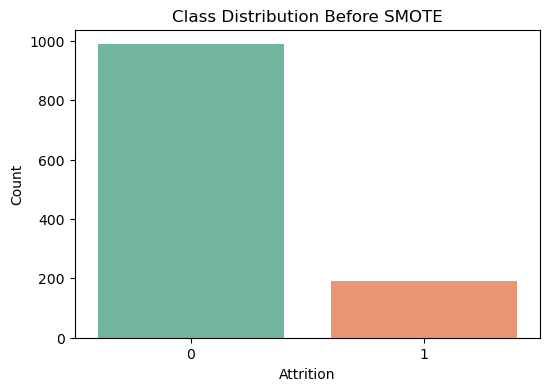

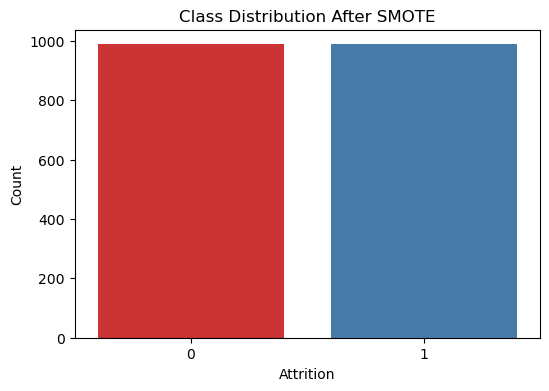

In [201]:
# Before SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# After SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_bal, palette='Set1')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

### Logistic Regression

In [202]:
# train the model
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=1000, random_state=42)

In [203]:
#predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [207]:
# 3. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[209  39]
 [ 15  32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.89       248
           1       0.45      0.68      0.54        47

    accuracy                           0.82       295
   macro avg       0.69      0.76      0.71       295
weighted avg       0.86      0.82      0.83       295



In [215]:
# If y_test is one-hot encoded, convert it to class labels
if isinstance(y_test, np.ndarray) and y_test.ndim == 2:
    y_test = y_test.argmax(axis=1)

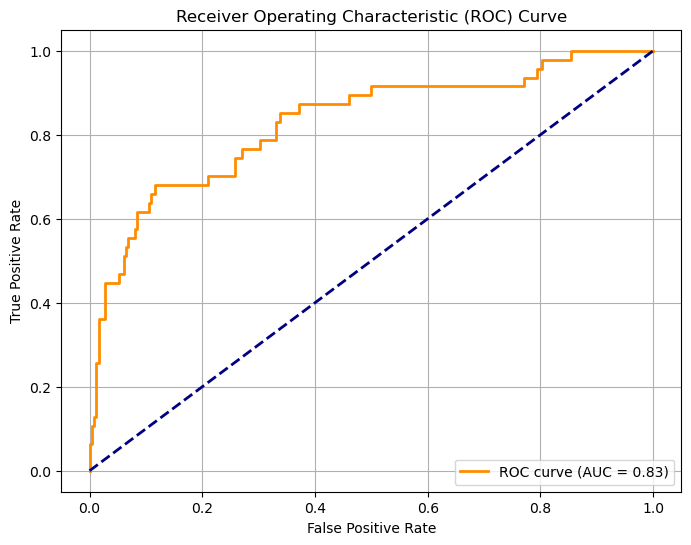

In [213]:
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [217]:
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


ROC AUC Score: 0.8293582704186685


### RandomForestClassifier

In [220]:
# train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [225]:
# predict on text data
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

In [226]:
# 3. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[240   8]
 [ 31  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92       248
           1       0.67      0.34      0.45        47

    accuracy                           0.87       295
   macro avg       0.78      0.65      0.69       295
weighted avg       0.85      0.87      0.85       295



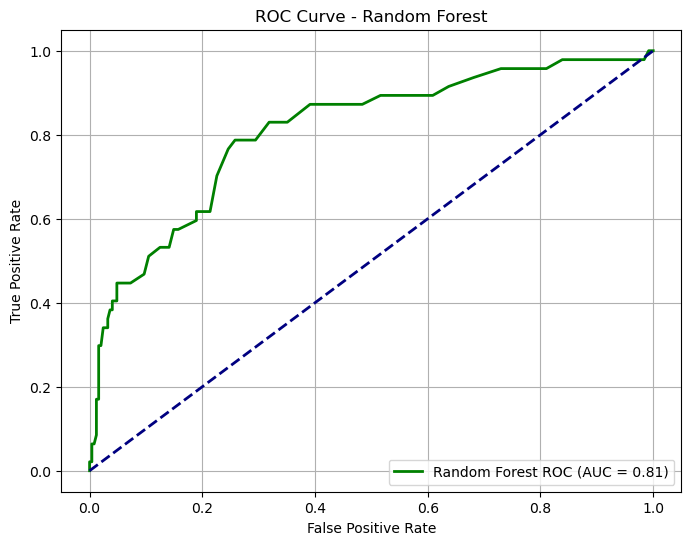

In [227]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [228]:
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_rf))


ROC AUC Score: 0.8093685655456417


### XGBClassifier

In [230]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [231]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [234]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_xgb))
print("Classification report:\n",classification_report(y_test, y_pred_xgb))

Confusion Matrix:
 [[239   9]
 [ 22  25]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       248
           1       0.74      0.53      0.62        47

    accuracy                           0.89       295
   macro avg       0.83      0.75      0.78       295
weighted avg       0.89      0.89      0.89       295



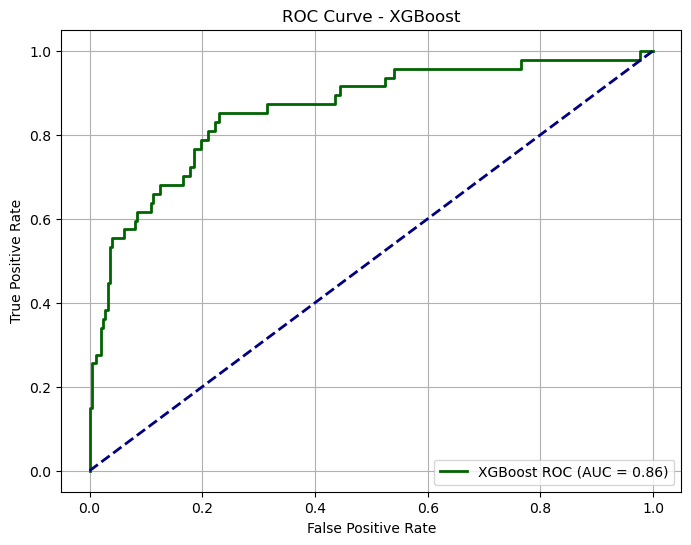

In [235]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkgreen', lw=2, label=f'XGBoost ROC (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [236]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

ROC AUC Score: 0.8601578586135896


# 6. Evaluation

C:\Users\sathv\AppData\Roaming\Python\Python311\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




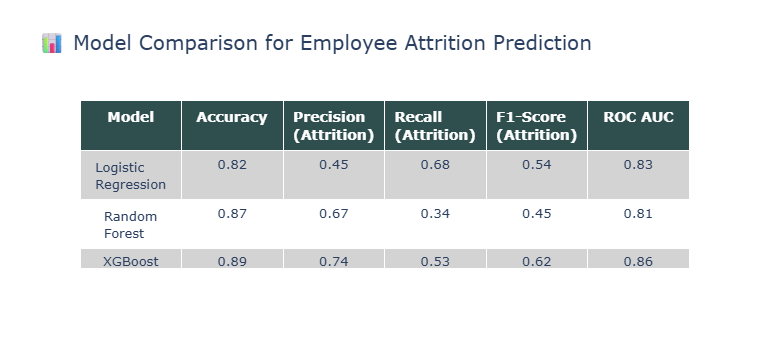

In [238]:
import plotly.graph_objects as go

# Define model metrics
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracy = [0.82, 0.87, 0.89]
precision = [0.45, 0.67, 0.74]
recall = [0.68, 0.34, 0.53]
f1_score = [0.54, 0.45, 0.62]
roc_auc = [0.83, 0.81, 0.86]

# Create table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["<b>Model</b>", "<b>Accuracy</b>", "<b>Precision (Attrition)</b>", "<b>Recall (Attrition)</b>", "<b>F1-Score (Attrition)</b>", "<b>ROC AUC</b>"],
        fill_color='darkslategray',
        font=dict(color='white', size=14),
        align='center'
    ),
    cells=dict(
        values=[models, accuracy, precision, recall, f1_score, roc_auc],
        fill_color=[['lightgray', 'white']*3],
        align='center',
        font=dict(size=13)
    )
)])

fig.update_layout(title="📊 Model Comparison for Employee Attrition Prediction", title_font_size=20)
fig.show()

C:\Users\sathv\AppData\Local\Temp\ipykernel_23776\2993750104.py:23: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



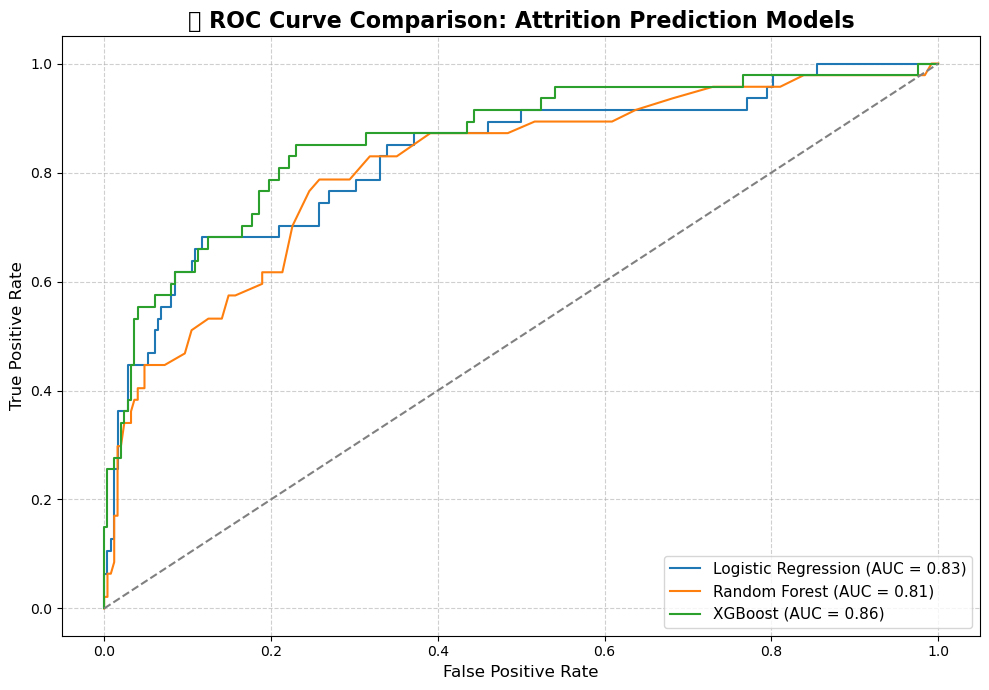

In [245]:
plt.figure(figsize=(10, 7))

# Ensure AUCs are floats
roc_auc = roc_auc[0] if isinstance(roc_auc, list) else roc_auc
roc_auc_rf = float(roc_auc_rf) if isinstance(roc_auc_rf, list) else roc_auc_rf
roc_auc_xgb = float(roc_auc_xgb) if isinstance(roc_auc_xgb, list) else roc_auc_xgb

# Plot each ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')


# Diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')

# Styling
plt.title('📊 ROC Curve Comparison: Attrition Prediction Models', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [246]:
import pickle

In [247]:
# save the model
with open('Employee attrition model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("Successfully saved aas Road_accident_model.pkl")

Successfully saved aas Road_accident_model.pkl


In [248]:
with open('Employee attrition model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use it for prediction
y_pred = loaded_model.predict(X_test)

In [249]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0])